# Введение


# Подготовка данных для проноза на 2017
**Цель- подготовить таблицу для прогноза, устранив пробелы и добавив необходимые столбцы**
**Этапы проекта:**
* Подготовка данных.  
* Анализ очищенных данных.
* Составление портрета пользователя для каждого из регионов
* Выдвижение нескольких гипотез
* Подведение итогов по результатам гипотез
* Общий вывод и подведение итогов работы.


Перед нами данные из открытых источников о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Продажи указаны в миллионах штук. Так же включены рейтинги экспертов и пользователей. 

#  Часть 1.
## Подготовка данных
На данном этапе мы проверим таблицу на количество пропусков, посмотрим общую информацию о таблице, поработаем с пропусками и добавми новый столбец с общими продажами.

### Общая инофрмация о таблице.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Приводим столбцы к нижнему регистру**

In [4]:
df.columns = map(str.lower,df.columns)

Проверяем как получилось

In [5]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Смотрим количество дубликатов

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Работа над пропусками.

In [9]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
df.loc[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Судя по всему, это английское сокращение выражение "ожидается что будет выставлена". Но, по каким-то причинам к базу данных попала в таком виде. Получается, можно приравнять её к NaN, чтобы сделать столбец цифровым.

In [11]:
df['user_score'] = pd.to_numeric(df['user_score'],errors='coerce')

In [12]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [13]:
df['rating'] = df['rating'].fillna('нет данных')

Так как рейтинг в таблице обозначает североамериканский тип возрастного рейтинга, то для остальных частей света он не актуален, и если игра там не выходила, то могла просто не получать такой рейтинг

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


К сожалению, восстановить данные в столбцах имя и год релиза невозможно, но именно эти данные нужны для исследований, придется от них избавиться. 

In [15]:
df = df.dropna(subset=['name', 'year_of_release'])

In [16]:
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [17]:
df["year_of_release"] = df['year_of_release'].astype('int64')

In [18]:
display(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,нет данных
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,нет данных
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,нет данных
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,нет данных
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,нет данных
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,нет данных


### Добавление новых данных.

In [19]:
df['total_sales'] = df.iloc[:,5:8].sum(axis=1)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,41.18
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,нет данных,11.16
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,19.84
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,17.16
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,нет данных,20.11
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,нет данных,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,нет данных,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,нет данных,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,нет данных,0.00


### Промежуточные таблицы с некоторыми подсчетами.

In [20]:
year_game = df.groupby(['year_of_release', 'platform']).agg(count_games=('name', 'count'))
year_game

count_games
year_of_release platform             
1980            2600                9
1981            2600               46
1982            2600               36
1983            2600               11
                NES                 6
...                               ...
2016            PSV                85
                Wii                 1
                WiiU               14
                X360               13
                XOne               87

[238 rows x 1 columns]

In [21]:
platform_game = df.groupby(['year_of_release','platform']).agg(sum_sales=('total_sales', 'sum'))
platform_game

sum_sales
year_of_release platform           
1980            2600           0.79
1981            2600           2.28
1982            2600           1.96
1983            2600           0.40
                NES            8.64
...                             ...
2016            PSV            4.10
                Wii            0.12
                WiiU           2.50
                X360           0.83
                XOne          11.88

[238 rows x 1 columns]

In [22]:
year_game.reset_index()
platform_game.reset_index()

,year_of_release,platform,sum_sales
0,1980,2600,0.79
1,1981,2600,2.28
2,1982,2600,1.96
3,1983,2600,0.40
4,1983,NES,8.64
...,...,...,...
233,2016,PSV,4.10
234,2016,Wii,0.12
235,2016,WiiU,2.50
236,2016,X360,0.83


In [23]:
platform_game = platform_game.merge(year_game, right_on=['year_of_release','platform'], left_on=['year_of_release','platform'])
platform_game

sum_sales  count_games
year_of_release platform                        
1980            2600           0.79            9
1981            2600           2.28           46
1982            2600           1.96           36
1983            2600           0.40           11
                NES            8.64            6
...                             ...          ...
2016            PSV            4.10           85
                Wii            0.12            1
                WiiU           2.50           14
                X360           0.83           13
                XOne          11.88           87

[238 rows x 2 columns]

# Часть 2.
##  Исследовательский анализ
На данном этапе мы проведем анализ полученных данных, поймем какой период нам нужен, чтобы сделать корректный прогноз, построим несколько топов по продажам.

Посмотрим на количество выпускаемых игр

### Продажи за всё время.

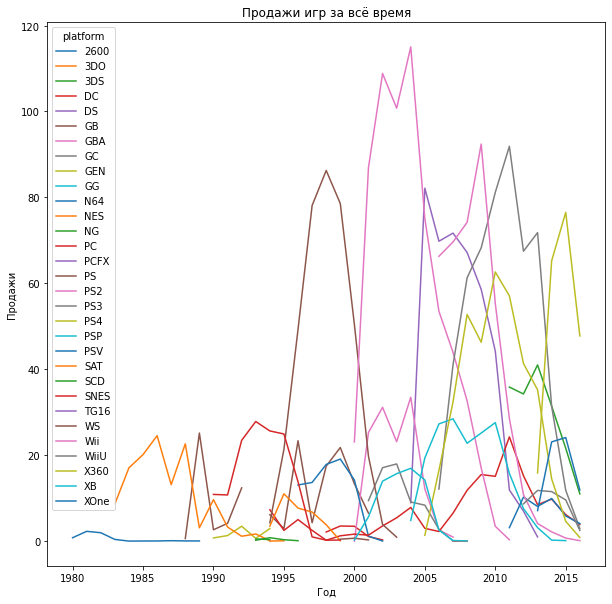

In [24]:

df.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack('platform').plot(
title='Продажи игр за всё время',
xlabel= 'Год',
ylabel= 'Продажи',
figsize=(10, 10))
plt.show()

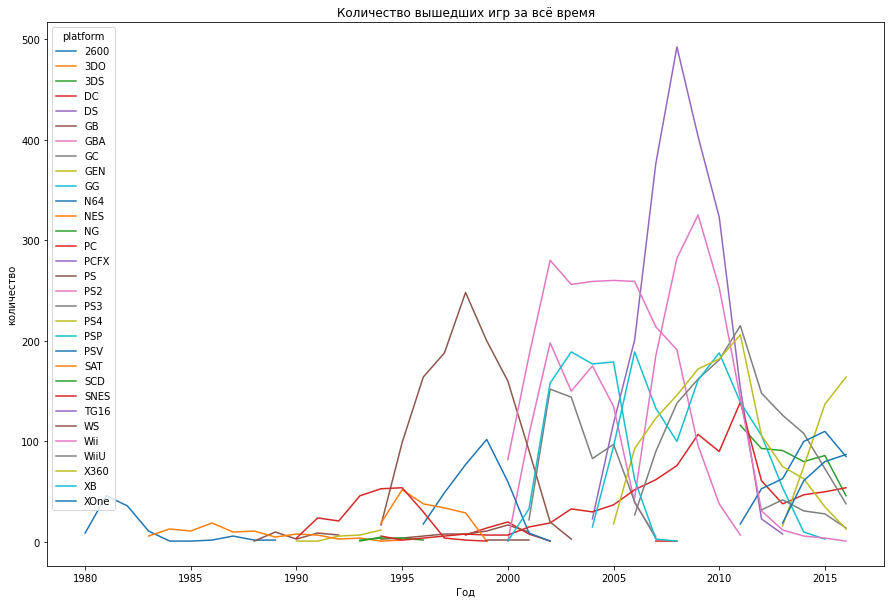

In [25]:

df.groupby(['platform', 'year_of_release'])['name'].count().unstack('platform').plot(
title='Количество вышедших игр за всё время',
xlabel= 'Год',
ylabel= 'количество',
figsize=(15, 10))
plt.show()

Взглянем на эти два графика. Так как цель получить актуальные данные для 2017 года, видно что рынок значительно вырос и данные до 2000 года для нас не актуальны. Так же видим что цикл жизни платформы 5-7 лет, за исключением PC. Если нужно будет делать прогноз по рынку в целом, то нужно будет оставить графу с PC в любом случае. Если нужно будет делать прогноз для набирающих популярность платформам, то нужно будет строить прогноз на основе схожих данных платформы. То есть, из графика следует что самой популярной была WII, но это консоль можно брать с собой, поэтому её продажи не повлияют на продажи стационарных платформ. 

**Оставим только актуальный период**

### Выбор только актуального периода. 

In [26]:
df_new = df.query('year_of_release>=2012')
df_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,14.03
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,6.61
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,нет данных,8.60
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,нет данных,9.32
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,8.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,нет данных,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,нет данных,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,нет данных,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,нет данных,0.01


### Продажи за актуальный период

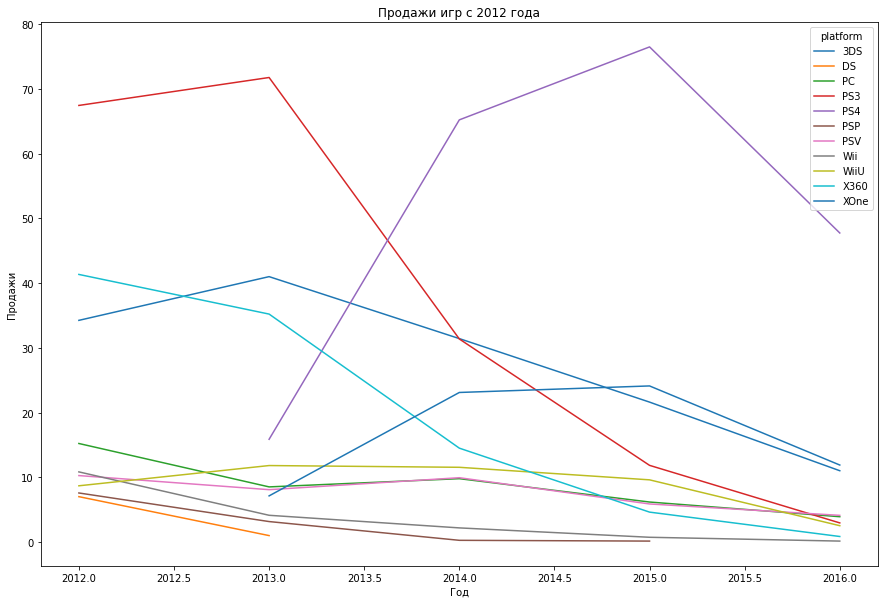

In [27]:

df_new.groupby(['platform','year_of_release'])['total_sales'].sum().unstack('platform').plot(
title='Продажи игр c 2012 года',
xlabel= 'Год',
ylabel= 'Продажи',
figsize=(15, 10))
plt.show()

Судя по графику, то продажи на PS4 уже падают, и если посмотреть на пересечение графика PS3 и PS4 ближе к концу 2014 года, то можно ожидать новую платформы в 2017 году, которая оживит продажи.

In [28]:



df_sort = df_new.groupby(['platform'])['total_sales'].sum().reset_index().sort_values('total_sales', ascending=False)

df_sort

,platform,total_sales
4,PS4,205.40
3,PS3,185.41
0,3DS,139.30
9,X360,96.49
10,XOne,66.20
8,WiiU,44.09
2,PC,43.53
6,PSV,38.20
7,Wii,17.92
5,PSP,11.06


### Продажи на всех платформах за актуальный период.

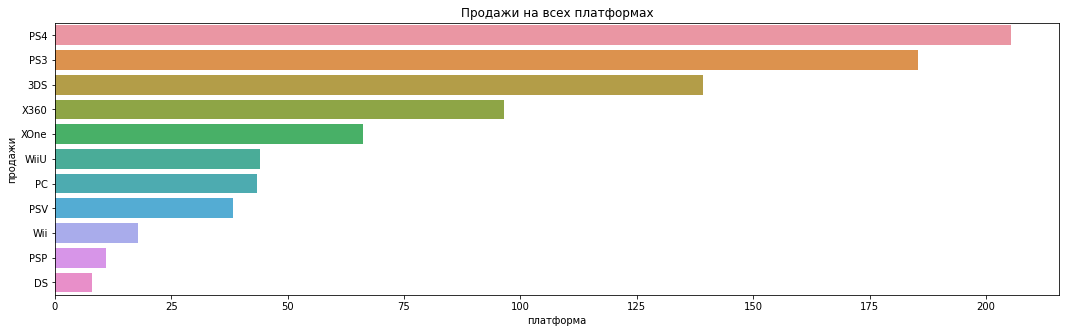

In [29]:

plt.figure(figsize=(18,5))
ax = sns.barplot(data=df_sort, x='total_sales', y='platform');
ax.set(title='Продажи на всех платформах',xlabel='платформа', ylabel='продажи')
plt.xlim()
plt.show()

Самая популярная платформа PS4, далее идет PS3. В пятерку популярных платформ входит WiiU. 

,platform,count_games
3,PS3,493
6,PSV,411
0,3DS,396
4,PS4,392
9,X360,292
2,PC,250
10,XOne,247
5,PSP,173
8,WiiU,147
7,Wii,54


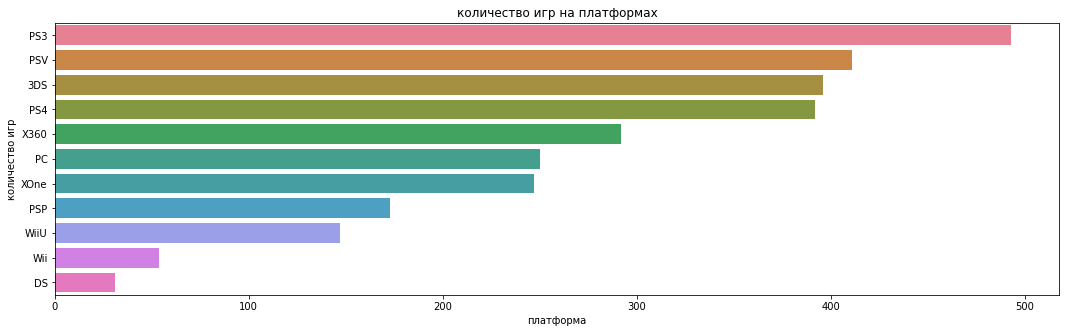

In [30]:
count_game = df_new.groupby([ 'platform']).agg(count_games=('name', 'count'))
count_game = count_game.reset_index().sort_values('count_games', ascending=False)
display(count_game)
plt.figure(figsize=(18,5))
ax = sns.barplot(data=count_game, x='count_games', y='platform',palette = "husl" );
ax.set(title='количество игр на платформах', xlabel='платформа', ylabel='количество игр')


plt.xlim()
plt.show()

In [31]:
df_plot = df_new.groupby([ 'platform', 'year_of_release']).agg(sum_sales=('total_sales', 'sum')).reset_index()

df_plot

,platform,year_of_release,sum_sales
0,3DS,2012,34.25
1,3DS,2013,41.01
2,3DS,2014,31.43
3,3DS,2015,21.61
4,3DS,2016,11.00
5,DS,2012,6.99
6,DS,2013,0.97
7,PC,2012,15.21
8,PC,2013,8.50
9,PC,2014,9.77


### Самые прибыльные платформы за актуальный период.

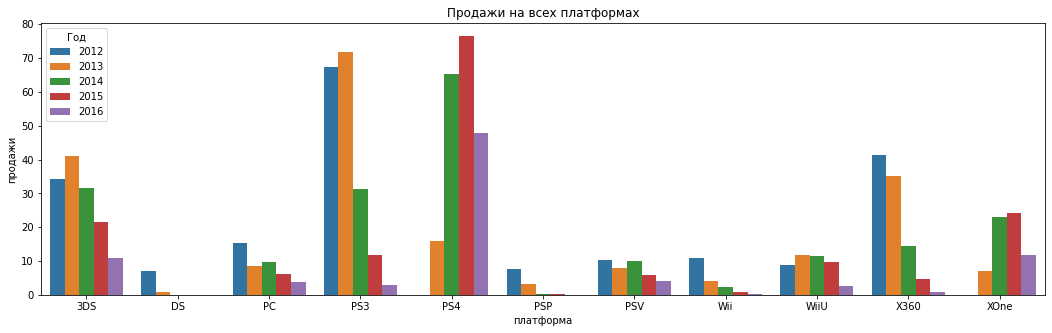

In [32]:
plt.figure(figsize=(18,5))
ax = sns.barplot( x ='platform'  ,y='sum_sales', hue ='year_of_release', data = df_plot)


ax.set(title='Продажи на всех платформах',xlabel='платформа', ylabel='продажи')
plt.legend(title='Год', loc='upper left')
plt.xlim()
plt.show()

In [33]:
df_plot.query('year_of_release>=2015').sort_values('sum_sales', ascending=False)

,platform,year_of_release,sum_sales
19,PS4,2015,76.53
20,PS4,2016,47.76
47,XOne,2015,24.11
3,3DS,2015,21.61
48,XOne,2016,11.88
15,PS3,2015,11.83
4,3DS,2016,11.00
38,WiiU,2015,9.59
10,PC,2015,6.16
28,PSV,2015,5.86


Как видно из этого графика, для каждой, даже самой популярной платформы характерно падение общих продаж в 2016 году. 

Хоть весь рынок и падает, но достаточно прибыльными остаются PS4, Xone и 3DS.

### Проверка полноты данных за 2016 год.

(0.0, 1.0)

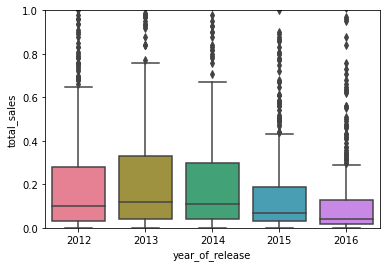

In [34]:
sns.boxplot(data=df_new, x='year_of_release', y='total_sales', palette = "husl")
plt.ylim(0,1)

In [35]:
df_2016 = df.query('year_of_release==2016')
df_2015 = df.query('year_of_release==2015')
display(df_2016.sort_values('total_sales', ascending=False).head(10))
display(df_2015.sort_values('total_sales', ascending=False).head(10))
print(df_2016['total_sales'].describe())
print(df_2015['total_sales'].describe())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,6.94
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,нет данных,4.16
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,3.54
289,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,2.97
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,2.86
325,Tom Clancy's The Division,PS4,2016,Shooter,1.35,1.70,0.15,0.60,80.0,7.0,M,2.45
571,FIFA 17,XOne,2016,Sports,0.43,2.05,0.00,0.17,84.0,5.5,E,2.22
708,Far Cry: Primal,PS4,2016,Action,0.60,1.25,0.06,0.35,76.0,6.3,M,1.66
968,Mafia III,PS4,2016,Action,0.42,1.08,0.03,0.28,68.0,5.1,M,1.39
1466,Yokai Watch 3,3DS,2016,Action,0.00,0.00,1.33,0.00,NaN,NaN,нет данных,1.33


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,нет данных,8.60
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,7.46
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,нет данных,4.99
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,4.64
406,Monster Hunter X,3DS,2015,Action,0.27,0.21,2.79,0.05,NaN,NaN,нет данных,3.05
303,The Witcher 3: Wild Hunt,PS4,2015,Role-Playing,1.02,2.13,0.23,0.59,92.0,9.2,M,2.95
247,Splatoon,WiiU,2015,Shooter,1.54,1.18,1.46,0.26,81.0,8.5,E10+,2.90
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,нет данных,2.80
396,Assassin's Creed Syndicate,PS4,2015,Action,0.81,1.99,0.07,0.52,76.0,6.8,M,2.58
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,2.55


count    502.000000
mean       0.169343
std        0.490976
min        0.000000
25%        0.020000
50%        0.040000
75%        0.130000
max        6.940000
Name: total_sales, dtype: float64
count    606.000000
mean       0.265875
std        0.684080
min        0.000000
25%        0.030000
50%        0.070000
75%        0.190000
max        8.600000
Name: total_sales, dtype: float64


In [36]:
df_new.groupby(['year_of_release']).agg(count_games=('name', 'count'))

,count_games
year_of_release,
2012,653
2013,544
2014,581
2015,606
2016,502


In [37]:
df_new.groupby(['year_of_release']).agg(sum_sales=('total_sales', 'sum'))

,sum_sales
year_of_release,
2012,202.58
2013,207.59
2014,199.26
2015,161.12
2016,85.01


После построения общего графика у меня возникла идея, что, так как падают продажи у всех платформ в 2016 году, то, возможно, представлены данные за 2016 год не полные. Но, судя по графикам выше, то просто идет общая тенденция падения продаж. Хотя более чем двухкратное падение продаж при сравнимом количестве игр наводят на подозрения

### Сравнение медианных продаж платформ.

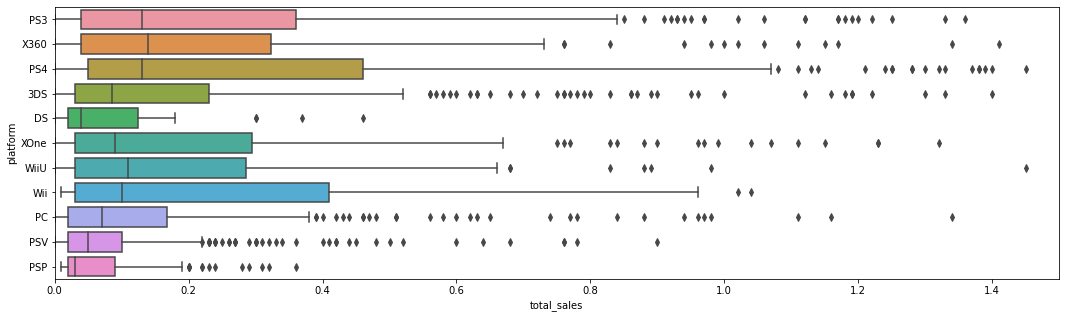

In [54]:

plt.figure(figsize=(18,5))
sns.boxplot(data=df_new, x='total_sales', y='platform');
plt.xlim(0,1.5)
plt.show()

Чем больше сумма общих продаж, тем меньше попадает в вбросы. Таким образом самые популярные релизы могут быть только на популрярных платформах.
Лучше всего сеюя по медианным продажам показали PS3, PS4, X360. Достаточно близкое медианное значение у Wii, WiiU.

### Корреляция между оценками критиков, игроков и продажами.

In [39]:


platform = df_new.query('platform=="PS4"')
platform_2 = df_new.query('platform=="PS3"')
display(platform[['total_sales','critic_score','user_score' ]].corr())
display(platform_2[['total_sales','critic_score','user_score' ]].corr())
display(df_new[['total_sales','critic_score','user_score' ]].corr())

,total_sales,critic_score,user_score
total_sales,1.000000,0.371857,-0.034918
critic_score,0.371857,1.000000,0.557654
user_score,-0.034918,0.557654,1.000000


,total_sales,critic_score,user_score
total_sales,1.000000,0.311255,0.003242
critic_score,0.311255,1.000000,0.539456
user_score,0.003242,0.539456,1.000000


,total_sales,critic_score,user_score
total_sales,1.000000,0.285793,0.018056
critic_score,0.285793,1.000000,0.517727
user_score,0.018056,0.517727,1.000000


 Как видно из этого, корреляция между продажами и оценками игроков и экспертов не очень большая. Зато есть корреляция между оценками игроков и оценками экспертов. Маркетинг игры делает гораздо больше для продаж, чем итоговые оценки. Но при этом, если игра хорошая или плохая, то это заметят и эксперты и игроки. И если взять вторую по популярности платформу или данные в целом, корреляции не меняются 

### Самые популярные по продажам жанры.

In [40]:
pivot_sales = pd.pivot_table(df_new, values='total_sales', index=['genre'], aggfunc=['sum', 'count', 'mean']).reset_index()
pivot_sales


,genre,sum,count,mean
,,total_sales,total_sales,total_sales
0,Action,263.28,1031,0.255364
1,Adventure,20.51,302,0.067914
2,Fighting,24.70,109,0.226606
3,Misc,46.85,192,0.244010
4,Platform,35.62,85,0.419059
5,Puzzle,3.76,28,0.134286
6,Racing,36.28,115,0.315478
7,Role-Playing,128.80,370,0.348108
8,Shooter,159.96,235,0.680681


Самое большое количество игр в жанре Action. Так же, там самые большие суммарные продажи. Но вот если разделить общую суммую на общее количество игр в этом жанре, то картина не такая радужная. Плюс, наверняка, зарабатывают большую часть денег крупные релизы. Так что в этом жанре не особо выгодно делать игры. При этом наименее выгодный жанр - Adventure. Там достаточно много игр, но достаточно маленькие общие продажи. Несмотря на достаточно большое количество игр в жанре Shooter, там выше всего акцент распределения среднего заработка на игру 

# Часть 3
##  Портрет пользователя каждого региона

Здесь мы рассмотрим продажи в каждом регионе по отдельности, поймем есть ли разница по популярности среди разных платформ и жанрах.

### Продажи в Северной Америке по платформам

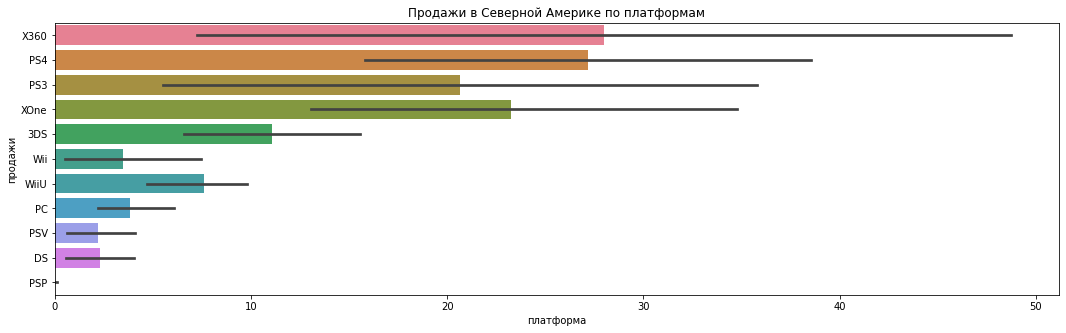

In [41]:
na_sales = df_new.groupby([ 'platform', 'year_of_release']).agg(sum_sales=('na_sales', 'sum')).reset_index().sort_values('sum_sales', ascending= False)
plt.figure(figsize=(18,5))
ax = sns.barplot(data=na_sales, x='sum_sales', y='platform',palette = "husl" );

ax.set(title='Продажи в Северной Америке по платформам',xlabel='платформа', ylabel='продажи')
plt.show()

В Северной Америке предпочитают в качестве платформы "местную". То есть, большинство на X360, которая выпущена в США. Достаточно высокое место занимает XOne, которая является улучшенной версией X360

### Продажи в Европе по платформам.

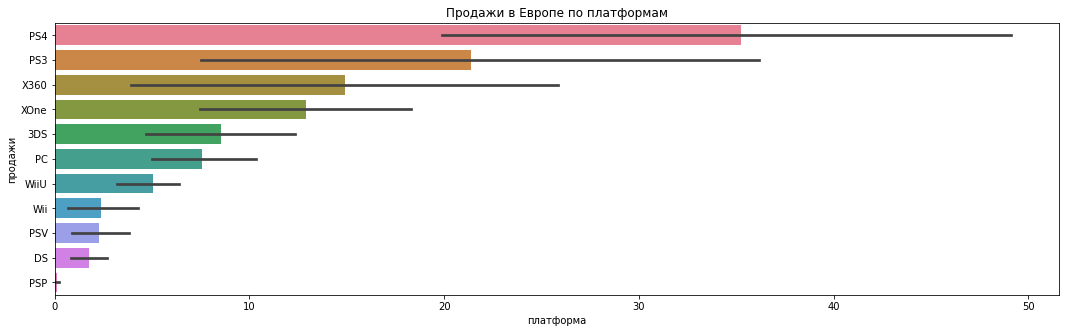

In [42]:
eu_sales = df_new.groupby([ 'platform', 'year_of_release']).agg(sum_sales=('eu_sales', 'sum')).reset_index().sort_values('sum_sales', ascending= False)
plt.figure(figsize=(18,5))
ax = sns.barplot(data=eu_sales, x='sum_sales', y='platform',palette = "husl" );
ax.set(title='Продажи в Европе по платформам',xlabel='платформа', ylabel='продажи')
plt.show()

В Европе распределение похоже на то, которое было в целом по миру. 

### Продажи в Японии по платформам

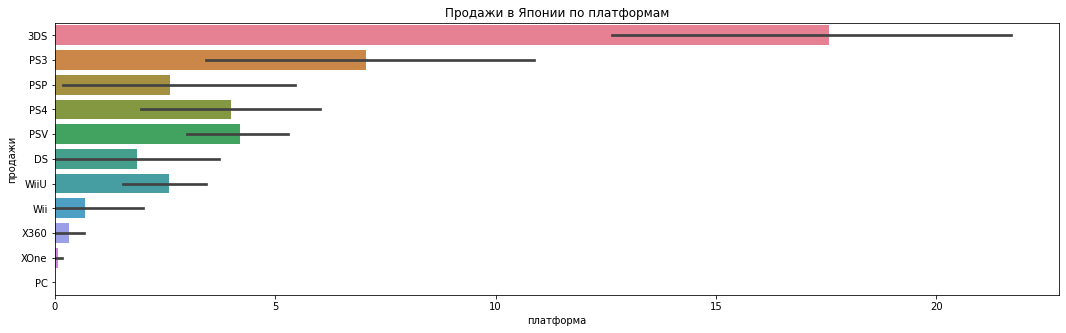

In [43]:
jp_sales = df_new.groupby([ 'platform', 'year_of_release']).agg(sum_sales=('jp_sales', 'sum')).reset_index().sort_values('sum_sales', ascending= False)
plt.figure(figsize=(18,5))
ax = sns.barplot(data=jp_sales, x='sum_sales', y='platform',palette = "husl" );
ax.set(title='Продажи в Японии по платформам',xlabel='платформа', ylabel='продажи')
plt.show()

На первом месте по продажам в Японии 3DS. Это консоль, которую можно брать с собой. Видимо, так потому что в Японии немного другой подход к играм, и они имеют не такие большие квартиры или дома как в США и Европе, а предпочитают играть в дороге.

### Продажи в Северной Америке по жанрам

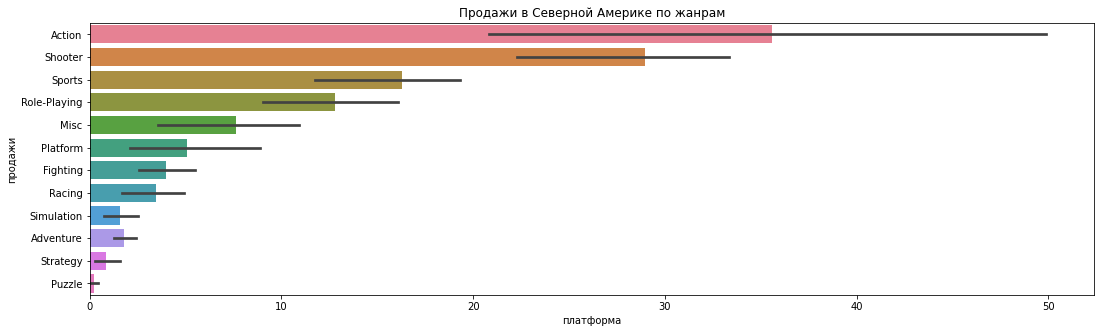

In [44]:
na_sales = df_new.groupby([ 'genre', 'year_of_release']).agg(sum_sales=('na_sales', 'sum')).reset_index().sort_values('sum_sales', ascending= False)
plt.figure(figsize=(18,5))
ax = sns.barplot(data=na_sales, x='sum_sales', y='genre',palette = "husl" );
ax.set(title='Продажи в Северной Америке по жанрам',xlabel='платформа', ylabel='продажи')
plt.show()

Action, Shooter, Sports, Misc, Platform- самые популярные жанры в Северной Америке. Точно так же, как и в мире в целом.

### Продажи в Европе по жанрам

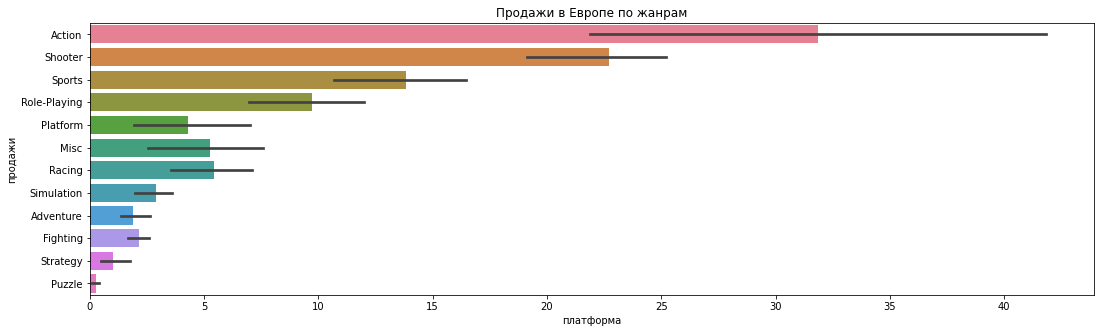

In [45]:
eu_sales = df_new.groupby([ 'genre', 'year_of_release']).agg(sum_sales=('eu_sales', 'sum')).reset_index().sort_values('sum_sales', ascending= False)
plt.figure(figsize=(18,5))
ax = sns.barplot(data=eu_sales, x='sum_sales', y='genre',palette = "husl" );
ax.set(title='Продажи в Европе по жанрам',xlabel='платформа', ylabel='продажи')
plt.show()

В Европе почти так же, как в Северной Америке. Разве что чуть популярнее гоночные игры. В целом, можно сказать, что в Европе и Северной Америке играют в одни и те же игры на одних и тех же платформах.

### Продажи в Японии по жанрам

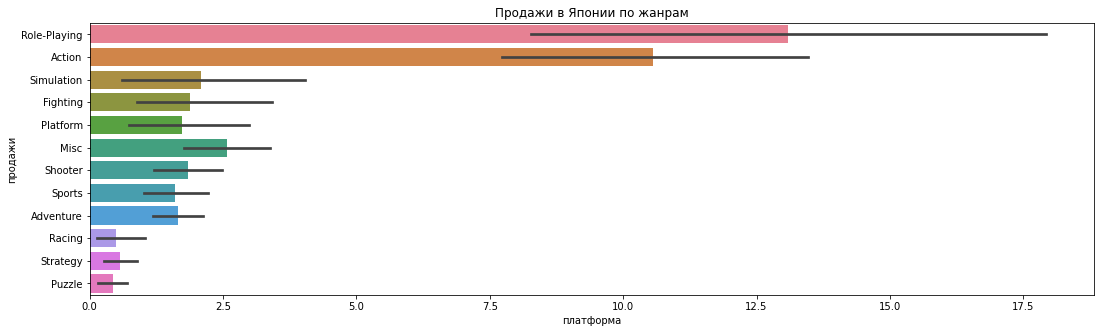

In [46]:
jp_sales = df_new.groupby([ 'genre', 'year_of_release']).agg(sum_sales=('jp_sales', 'sum')).reset_index().sort_values('sum_sales', ascending= False)
plt.figure(figsize=(18,5))
ax = sns.barplot(data=jp_sales, x='sum_sales', y='genre',palette = "husl" );
ax.set(title='Продажи в Японии по жанрам',xlabel='платформа', ylabel='продажи')
plt.show()

В Японии наиболее популярны RPG. Думаю, потому что в таблице нет ответвления на жанр Jrpg. Это RPG, который родился именно в Японии.  Так же особо популярны файтинги, так как культура боевых искусств дает о себе знать

### корреляция между продажами и рейтингом ESRB

<AxesSubplot:xlabel='jp_sales', ylabel='rating'>

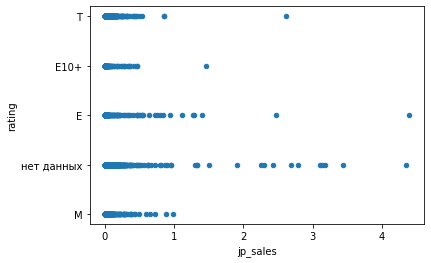

In [47]:
#display(df_new[['jp_sales', 'rating' ]].corr())
df_new.plot.scatter(x='jp_sales',y='rating')

Больщая часть продаж приходится на "нет данных", что не удивительно. Очень многие игры в Японии не получали этот рейтинг, так как не выходили за пределами Японии. А этот рейтинг присваивают в США.

<AxesSubplot:xlabel='eu_sales', ylabel='rating'>

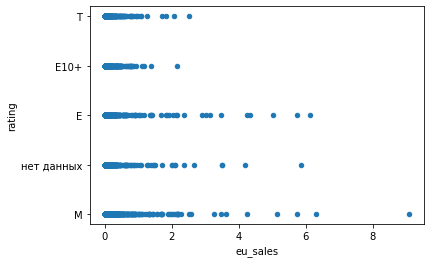

In [48]:
df_new.plot.scatter(x='eu_sales',y='rating')

В Европе и Северной Америке в основном одни и те же игры, поэтому приблизительно одинаково распределны продажи по всем видам этого рейтинга.

<AxesSubplot:xlabel='na_sales', ylabel='rating'>

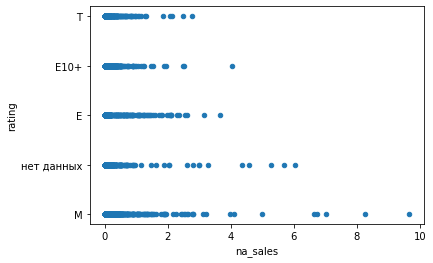

In [49]:
df_new.plot.scatter(x='na_sales',y='rating')

Наиболее популярныв в США игры с рейтинго М, что означает для взрослых. Не удивительно GTA изрядно пошумевшая имеет именно такой рейтинг

# Часть 4
## Выдвижение гипотез. 


### Гипотеза 1.
Есть предположение, что так как платформы **X360** и **PC** похожи по архитектуре, и у них один и тот же производитель, то и оценки у игр на этих платформах будут похожие.

**Нулевая гипотеза** - оценки игр на платформах **x360** и **PC** похожие. 

**Альтернативная гипотеза** - оценки игр на на платформах **x360** и **PC** отличаются. 

In [50]:

x360 = df_new.loc[df_new.platform == 'X360', 'user_score']
PC = df_new.loc[df_new.platform ==  'PC', 'user_score']
PC = PC.dropna()
x360 = x360.dropna()

In [51]:
results = st.ttest_ind(x360, PC, equal_var=True)
 
alpha = 0.05 
 
print(results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.17951812027167968
Не получилось отвергнуть нулевую гипотезу


Действительно подтвердилась теория что оценки игр схожие из-за схожести архитектур. 

### Гипотеза 2.
Предположим что оценки игр в жанре **Action** и **Sports** разные. Данные о продажах у этих жанров сильно разнятся, то может есть еще и существенная разница в оценках.

**Нулевая гипотеза** - оценки игр в жанрах Action и Sports похожие. 

**Альтернативная гипотеза** - оценки игр в жанрах Action и Sports отличаются.


In [52]:

action = df_new.loc[df_new.genre == 'Action', 'user_score']
sports = df_new.loc[df_new.genre ==  'Sports', 'user_score']
action = action.dropna()
sports = sports.dropna()

In [53]:
 
results = st.ttest_ind(action, sports, equal_var=False)
 
alpha = 0.05 
 
print(results.pvalue)
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

4.24307776572644e-20
Отвергаем нулевую гипотезу


### Общий вывод из гипотез.

В первом случае рейтинги игр на Xbox и PC почти одинаковые, так как, как правило, выходят одни и те игры за редким искллючением. Шедевров, способных повлиять на рейтинг не так много. Есть некоторые эксклюзивы платформы, но их слишком мало чтобы сдвинуть средний рейтинг в ту или иную сторону. Нулевая гипотеза подтверждена. 

Во втором случае рейтинги слишком разных жанров сложно сравнивать, поэтому гипотеза отвергнута. Такое произошло, скорее всего, потому что жанр Sports рассчитан больше на фанатов того или иного спорта, и когда обычный игрок пытается начать играть в него, то портит среднюю оценку, не поняв общие правила. Разработчики таких игр расчитывают что правила известны игрокам. Жанр же Action изначально расчитан на массового игрока, ему проще освоить игру и получать от неё удовольствие. Поэтому могут разнится оценки. 

## Вывод

Проведена работа по исследованию таблицы данных с играми. Пропусков и других аномальных значений не выявлено. Пришлось избавиться от незначительной части таблицы, где отсуствовали имена и года релизов, так как это помешало бы дальнейшей работе. Там где нужно, заполнены пропуски. Изменены типы некоторых столбцов. Был добавлен новый столбец с общими продажами по всем регионам. 
Была проведена работа по выявлению лучших платформ по количеству продаж игр и по количеству игр. Не было выявлено корреляции между продажами и оценками игроков, что означает что на продажи больше всего влияет умелый маркетинг. Проведен анализ по жанрам. Самый популярный и прибыльный жанр Action, но если разделить прибыль на количество игр, то перспективы в нем не так радужны. 
Составлен портрет по популярным платформам и жанрам в разных частях света. Можно сказать, что в Северная Америка и Европа обладают схожими интересами в жанрах. Предпочтения же по платформам у Северной Америки и Европы немного различаются. В Северной Америке есть заметный крен в сторону местных платформ, тогда как в Европе нет особой разницы с мировыми продажами.  В Японии отличаются и самые популярные платформы - преобладает 3DS, так как её можно носить с собой и она не занимает много места в доме. И самые популярные жанры не такие как в Европе и Северной Америке. В Японии наиболее популярны файтинги и RPG в силу культурных особенностей. Не было выявлено корреляции между ESRB и продажами где-то, кроме Северной Америки, что логично, так как это именно североамериканский рейтинг. 
Были выдвинуты две гипотезы. Первая о том, что оценки пользователей x360 и pc одинаковые. Эта гипотеза подтвердилась. Это может быть обьяснено общей схожестью архитектуры платформ. Плюс, вендор у этих платформ одинаковый. Вторая гипотеза заключалась в том, что так как экшн и спорт сильно различаются по продажами, то и оценки у них могут разнится. Нулевая гипотеза заключается в том, что оценки у них все-таки одинаковые. Альтернативная - оценки разнятся. В итоге отверглась нулевая гипотеза и мы пришли к выводу что оценки разнятся.

В целом можно сделать вывод что рынок падает. Скорее всего, он находится в ожидании новых платформ, которые дадут небольшой толчок продажм. Так же, так как тут нет данных о мобильных играх, могу предположить что часть прибыли перетекает в мобильные игры. Мобильные телефоны достаточно мощные и массовые, чтобы на них можно было играть. Плюс, они всегда с собой в отличие от консолей, даже мобильных. Чтобы играть в мобильные игры, не нужно покупать дополнительное устройство, что упрощает вход для потенциального потребителя.